In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string

In [5]:
stemmer=nltk.SnowballStemmer('english')
stopword=set(stopwords.words("english"))

In [8]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [7]:
pd.set_option('display.max_colwidth', None)

In [10]:
tweets = df[["tweet"]]
tweets

,tweet
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...
24778,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24779,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,youu got wild bitches tellin you lies


In [11]:
def clean(text):
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
df["tweet"] = df['tweet'].apply(clean)

In [15]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [17]:
df.shape

(24783, 7)

In [18]:
def preprocessing (text):
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    return text

In [19]:
df["tweet"] = df['tweet'].apply(preprocessing)

In [20]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean hous amp man alway take trash
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch start cri confus shit
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might faker bitch told ya


In [22]:
class_new = df["class"].map({0:1,1:0,2:0})
df["class"] = class_new
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,0,rt mayasolov woman shouldnt complain clean hous amp man alway take trash
1,1,3,0,3,0,0,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0,3,0,0,rt urkindofbrand dawg rt ever fuck bitch start cri confus shit
3,3,3,0,2,1,0,rt cganderson vivabas look like tranni
4,4,6,0,6,0,0,rt shenikarobert shit hear might true might faker bitch told ya


In [23]:
categories = {1:"hate_speech",0:"another",}
value = df['class'].map(categories)
index = df.columns.get_loc("tweet")
df.insert(index,"value",value)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,value,tweet
0,0,3,0,0,3,0,another,rt mayasolov woman shouldnt complain clean hous amp man alway take trash
1,1,3,0,3,0,0,another,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0,3,0,0,another,rt urkindofbrand dawg rt ever fuck bitch start cri confus shit
3,3,3,0,2,1,0,another,rt cganderson vivabas look like tranni
4,4,6,0,6,0,0,another,rt shenikarobert shit hear might true might faker bitch told ya


In [25]:
x = np.array(df["tweet"])
y= np.array(df['class'])

cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
y_val_pred = clf.predict(x_val)
score = accuracy_score(y_val,y_val_pred)
print("validation score : {:.4f}".format(score))

validation score : 0.9266


In [29]:
y_test_pred = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.4f}".format(test_accuracy))

Test Accuracy: 0.9268


In [44]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4667
           1       0.37      0.35      0.36       290

    accuracy                           0.93      4957
   macro avg       0.66      0.66      0.66      4957
weighted avg       0.93      0.93      0.93      4957



In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 100)
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.01%


In [43]:
print(classification_report(y_test,logreg_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4667
           1       0.46      0.16      0.24       290

    accuracy                           0.94      4957
   macro avg       0.71      0.57      0.60      4957
weighted avg       0.92      0.94      0.93      4957



In [39]:
i = "I don't like your attitude"
i = cv.transform([i]).toarray()
print(clf.predict((i)))

[0]


[[4492  175]
 [ 188  102]]


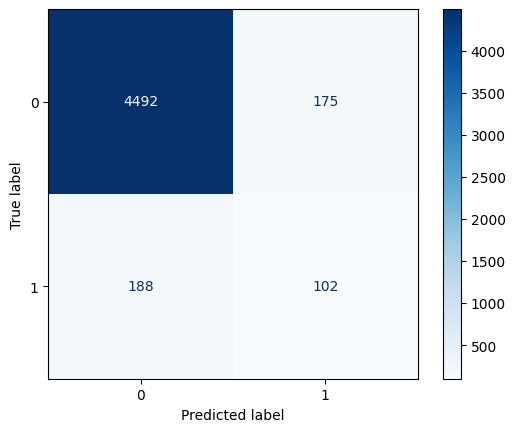

In [47]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
    )
print(disp.confusion_matrix)

In [41]:
import pickle
pickle.dump(cv, open('transformer_hate_speech.pickle', 'wb'))
pickle.dump(clf, open('model_hate_speech.pickle', 'wb'))

In [49]:
import gradio as gr

def predict(i):
    i = cv.transform([i]).toarray()
    if clf.predict((i))==0:
        a='No Hate Speech'
        return a
    else:
        a='Hate Speech'
        return a
        

input_text = gr.Textbox(lines=5, label="Enter Text")
output_text = gr.Textbox(label="Processed Text")

gr.Interface(fn=predict, inputs=input_text, outputs=output_text).launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
